In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import pandas as pd

# Unusual Observations
### Outlier, Leverage, and Influential Points

## **Leverage** 
- a data point whose x-value (independent) is unusual, y-value follows the predicted regression line though. A leverage point may look okay as it sits on the predicted regression line. However, a leverage point will inflate the strength of the regression relationship by both the statistical significance (reducing the p-value to increase the chance of a significant relationship) and the practical significance (increasing r-square). Unfortunately, leverage points have no impact on the coefficients because the point follows the predicted regression line. 

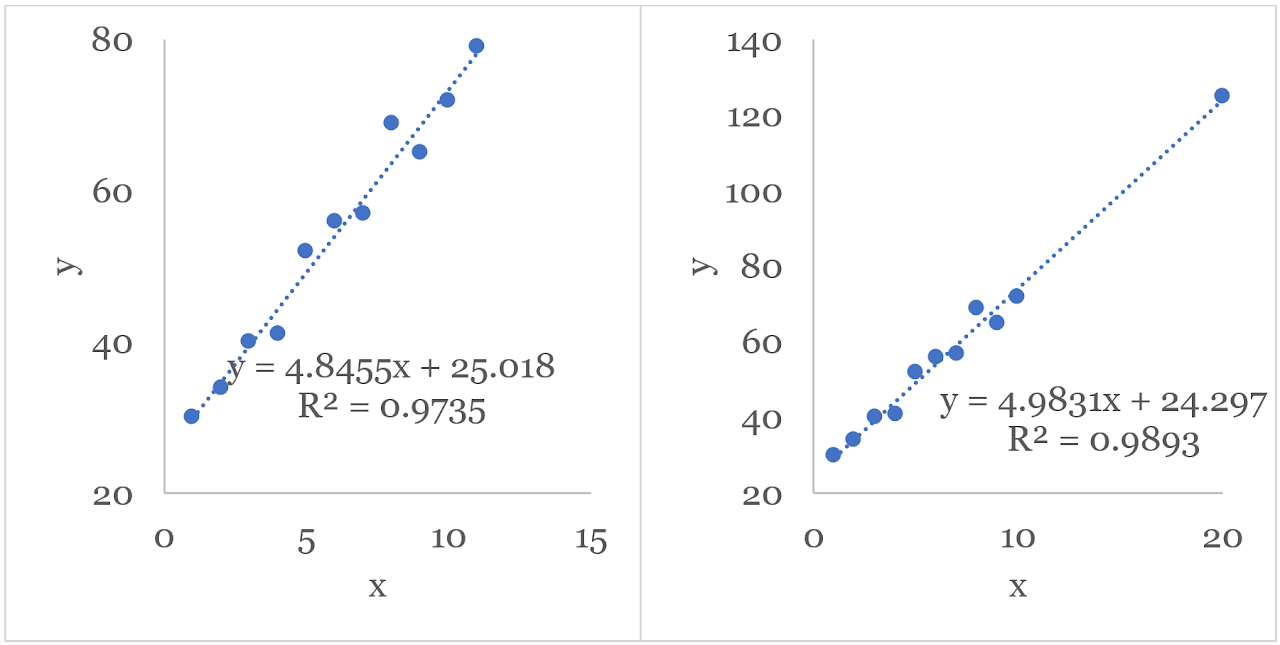

## **Outlier** 
- an outlier is defined by an unusual observation with respect to either x-value or y-value. An x-outlier will make the scope of the regression too broad, which is usually considered less accurate. An x-outlier is uncommon, it may seriously affect the regression outcomes though. However, in an unplanned study, often the data is collected before putting much thought into it. In those situations, there could be a possibility of having x-outliers. The y-outliers are very common, and it is usually not as severe as the x-outlier. Nevertheless, the effects of the y-outliers must be investigated further to check whether it is just a simple data entry error, or some severe issue in the process, or just a random phenomenon.

- These extreme values need not necessarily impact the model performance or accuracy, but when they do they are called “Influential” points.

- **Note**: An **outlier** is a data point that diverges from an overall pattern in a sample. An **influential** point is any point that has a large effect on the slope of a regression line.

# Types of Outliers
### 1- Univariate Outliers:

- Occur when a data point has an extreme value on a single variable.


### 2- Multivariate outliers: 
- Occur when a data point is extreme in multiple variables simultaneously. 
+ Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

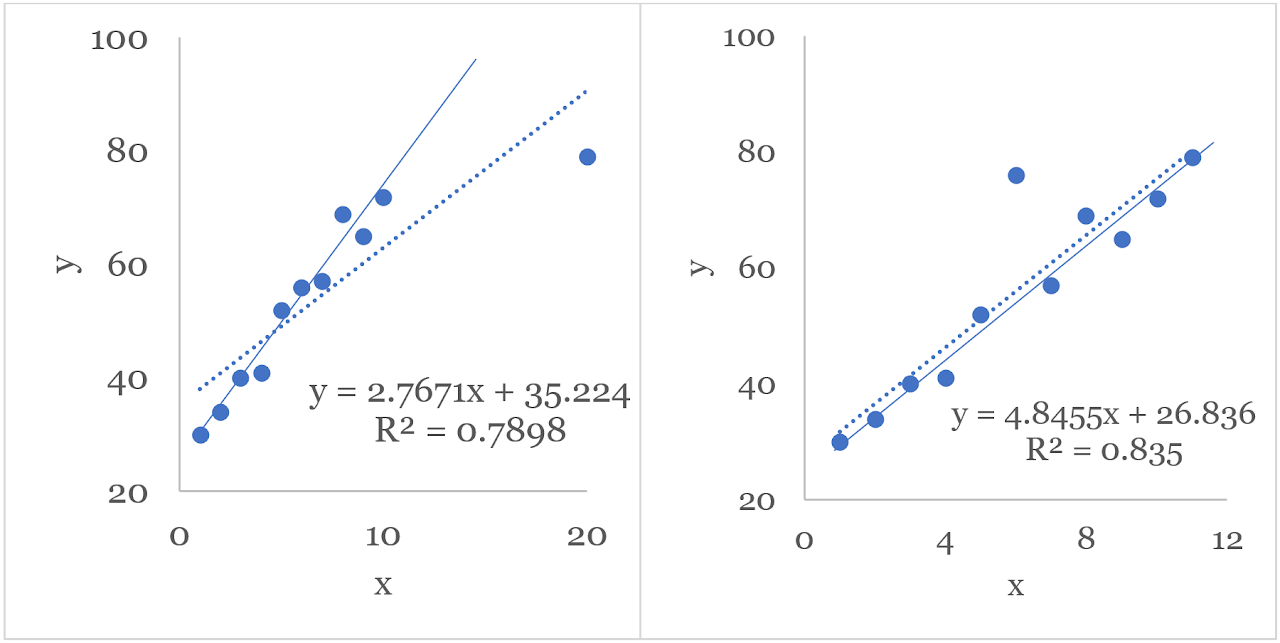

## List of Machine Learning algorithms which are sensitive to outliers:
1. Linear Regression
2. Logistic Regression
3. Support Vector Machine
4. K- Nearest Neighbors
5. K-Means Clustering
6. Hierarchical Clustering
7. Principal Component Analysis

## List of Machine Learning algorithms which are not sensitive to outliers:
1. Decision Tree
2. Random Forest
3. XGBoost
4. AdaBoost
5. Naive Bayes

# Common Methods for Detecting Outliers
#### There are multiple methods to identify outliers in the dataset

* Box plot
* Z-score method
* Scatter plot 
* IQR score

### Box-Plot
- In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

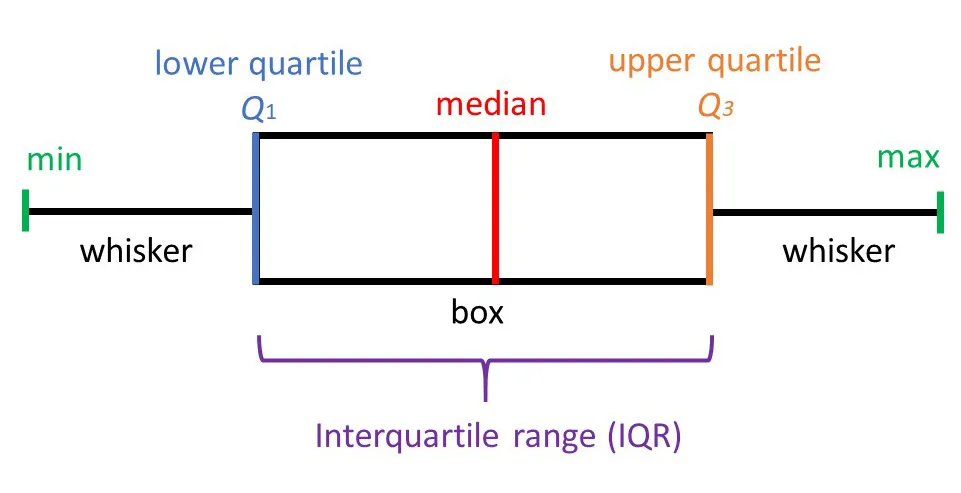

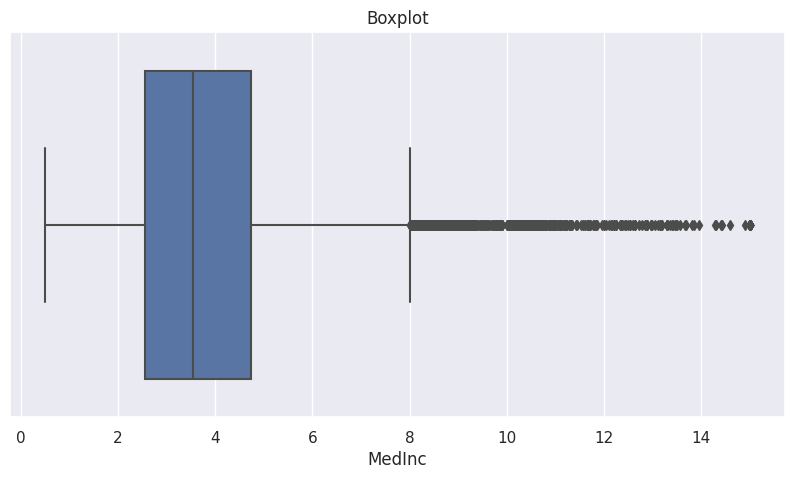

In [42]:
# Import the required Python libraries as follows:
from sklearn.datasets import fetch_california_housing

# Let’s load the California house prices dataset from scikit-learn as follows:
X, y = fetch_california_housing(
return_X_y=True, as_frame=True)

#Let’s make a boxplot of the MedInc variable to visualize outliers as follows:
plt.figure(figsize=(10,5))
sns.boxplot(x=X["MedInc"])
plt.title("Boxplot")
plt.show()

- The outliers are the asterisks sitting outside the whiskers, which delimit IQR proximity
rule boundaries.

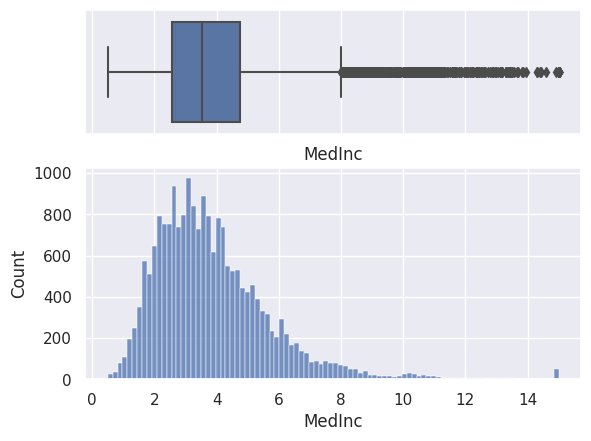

In [43]:
# Let’s now create a function to plot a boxplot on top of a histogram:
def plot_boxplot_and_hist(data, variable):
#figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True,
    gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.title(variable)
    plt.show()
    
#Let’s now use the previous function to create the plots for the MedInc variable:
plot_boxplot_and_hist(X, "MedInc")

## Z-score
- The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

- This method assumes that the variable has a Gaussian distribution. It represents the number of standard deviations an observation is away from the mean.
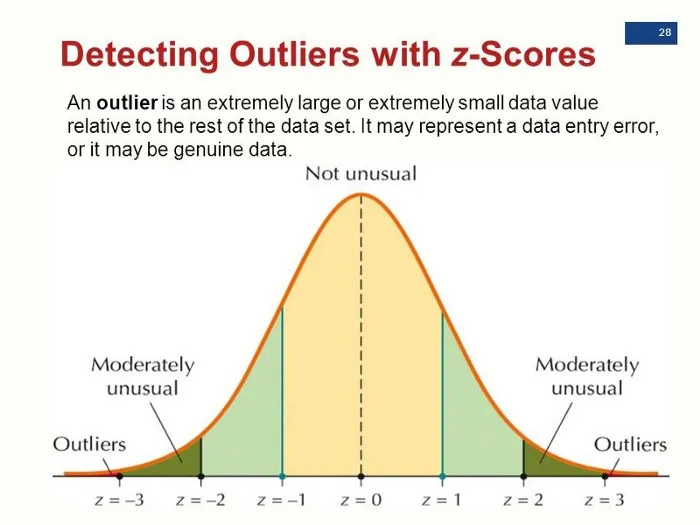

## Scatter plot
- A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.
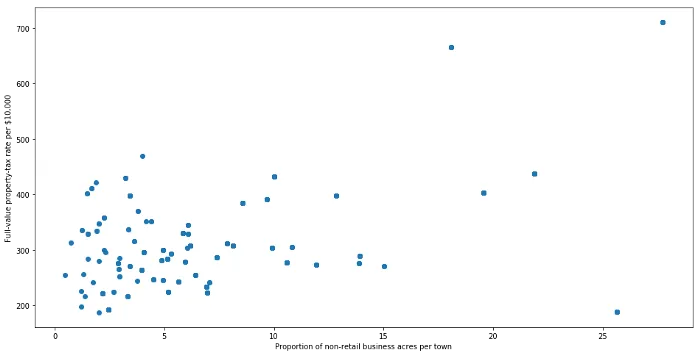

In [49]:
from sklearn.datasets import load_breast_cancer
# Let’s load the Breast Cancer dataset from scikit-learn:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(
breast_cancer.data,
columns=breast_cancer.feature_names
)

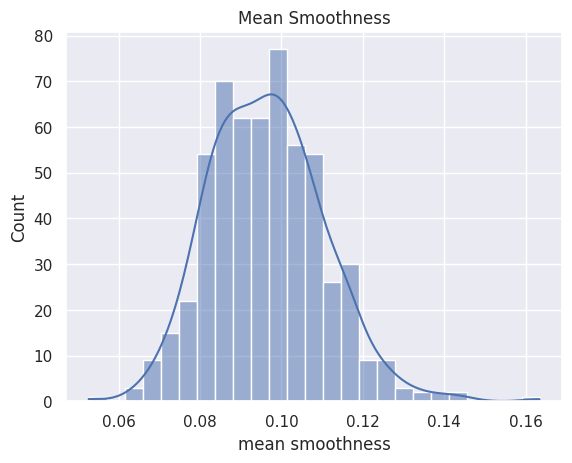

In [58]:
sns.histplot(data=X,x='mean smoothness',kde=True)
plt.title('Mean Smoothness');

In [59]:
#  Let’s create a function that returns the mean plus and minus fold times the standard deviation, where fold is a parameter to the function:
def find_limits(df, variable, fold):
    lower_limit = df[variable].mean() - fold * df[variable].std()
    upper_limit = df[variable].mean() + fold * df[variable].std()
    return lower_limit, upper_limit

# Let’s use the function to capture the extreme limits of the mean smoothness variable, which follows approximately a Gaussian distribution:
lower_limit, upper_limit = find_limits(
    X, "mean smoothness", 3)

# Let’s create a Boolean vector that flags observations with values beyond the limits:
outliers = np.where(
    (X["mean smoothness"] > upper_limit) |
    (X["mean smoothness"] < lower_limit),
    True,
    False,
)

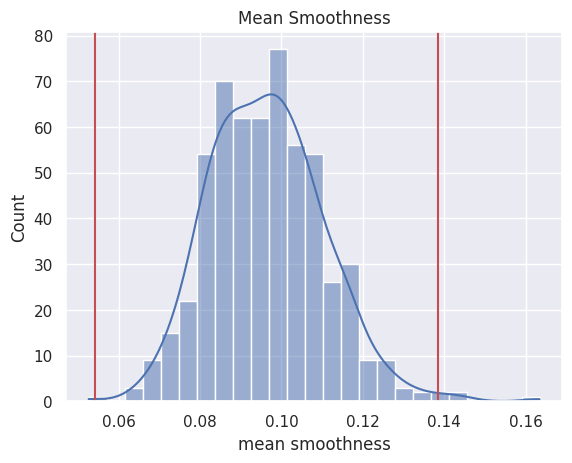

In [60]:
sns.histplot(data=X,x='mean smoothness',kde=True)
plt.title('Mean Smoothness')
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r');

In [65]:
X['mean smoothness'].iloc[outliers].sort_values()

568    0.05263
105    0.13980
3      0.14250
122    0.14470
504    0.16340
Name: mean smoothness, dtype: float64

# Removing outliers

In [68]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 9.6 MB/s eta 0:00:00


In [124]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer

# Let’s load the California housing dataset from scikit-learn and separate it into a training and a testing set:
X, y = fetch_california_housing(
return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# Let’s create a function to find the boundaries of a variable distribution using the interquartile range proximity rule:
def find_limits(df, variable, fold):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)
    return lower_limit, upper_limit

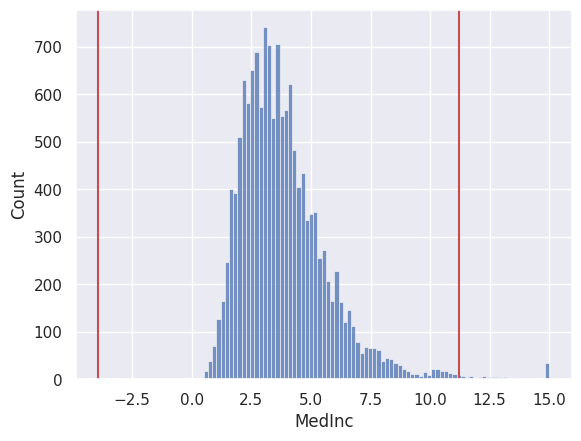

In [135]:
# Let’s use the function from step 3 to determine the limits of the MedInc variable:
lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)

sns.histplot(data=X_train,x='MedInc')
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r')

In [114]:
X_train["MedInc"].le(lower_limit).sum() ,X_train["MedInc"].ge(upper_limit).sum()

(0, 100)

- There are 100 point after the our designed range which is the upperlimit = 1.5*IQR, so it will be considered as an outliers

In [117]:
# Let’s retain the observations whose value is greater than or equal to (ge) the lower limit in the train and test sets:
inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

# Let’s retain the observations whose value is lower than or equal to (le) the upper limit:
inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

(0, 0)

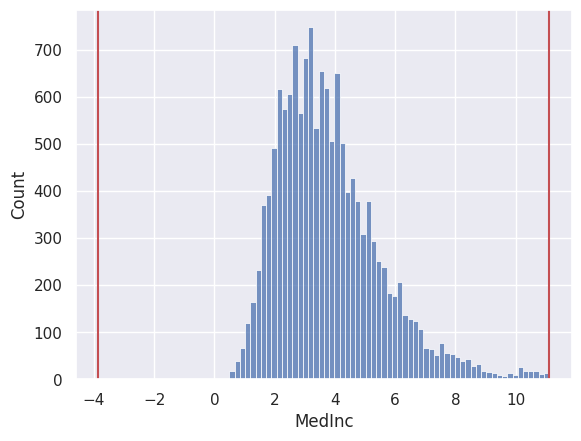

In [118]:
# Let’s use the function from step 3 to determine the limits of the MedInc variable:
lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)

sns.histplot(data=X_train,x='MedInc')
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r')
X_train["MedInc"].le(lower_limit).sum(),X_train["MedInc"].ge(upper_limit).sum()

## Now, we will remove outliers across multiple variables utilizing **Feature-engine**. First, we need to separate the data into a training and a testing set as we did in step 2.

In [137]:
# Let’s load the California housing dataset from scikit-learn and separate it into a training and a testing set:
X, y = fetch_california_housing(
return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

(0, 310)

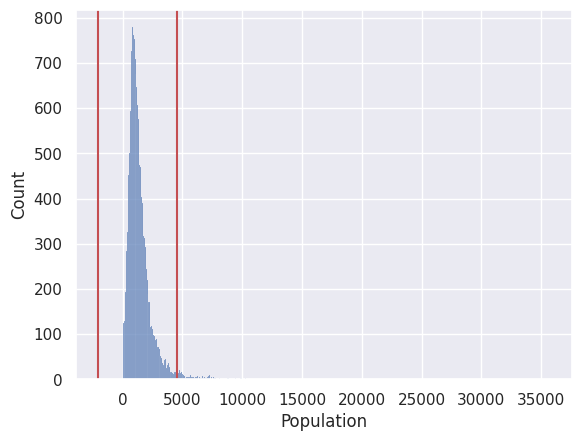

In [138]:
# Let’s use the function from step 3 to determine the limits of the Population variable:
lower_limit, upper_limit = find_limits(X_train, "Population", 3)

sns.histplot(data=X_train,x='Population')
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r')
X_train["Population"].le(lower_limit).sum(),X_train["Population"].ge(upper_limit).sum()

In [141]:
# Let’s set up a transformer to remove outliers in three variables by determining the limits with the IQR rule:
trimmer = OutlierTrimmer(
    variables = ["MedInc", "HouseAge", "Population"],
    capping_method="iqr",
    tail="both",
    fold=1.5,
    )

In [143]:
# Let’s fit the transformer to the data so that it learns those limits:
trimmer.fit(X_train)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['MedInc', 'HouseAge', 'Population'])

In [144]:
# Finally, let’s remove outliers from the train and test sets:
X_train_enc = trimmer.transform(X_train)
X_test_enc = trimmer.transform(X_test)

(0, 0)

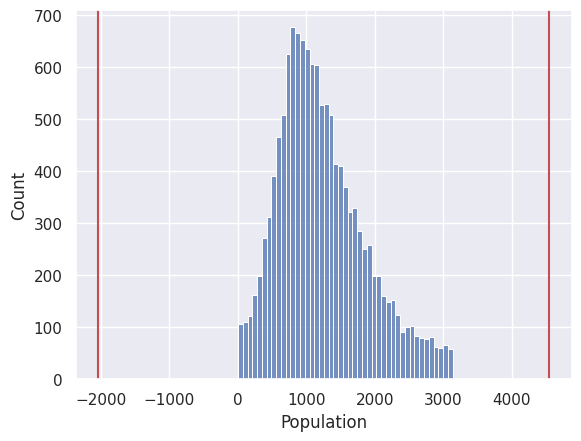

In [145]:
sns.histplot(data=X_train_enc,x='Population')
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r')
X_train_enc["Population"].le(lower_limit).sum(),X_train_enc["Population"].ge(upper_limit).sum()

## Capping or censoring outliers
- Capping or censoring is the process of transforming the data by limiting the extreme values, as in the outliers, to a certain maximum or minimum arbitrary value. With this procedure, the outliers are not removed but are instead replaced by other values. A typical strategy involves setting outliers to a specified percentile. For example, we can set all data below the 5th percentile to the value at the 5th percentile **and all data greater than the 95th percentile to the value at the 95th percentile.

In [146]:
from sklearn.datasets import load_breast_cancer
from feature_engine.outliers import Winsorizer

In [165]:
# Let’s load the Breast Cancer dataset from scikit-learn and then separate it into a train and a test set:
X = pd.DataFrame(
breast_cancer.data,
columns=breast_cancer.feature_names)
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# Let’s create a function that returns the mean plus and minus fold times the standard deviation, where fold is a parameter to the function:
def find_limits(df, variable, fold):
    lower_limit = df[variable].mean() - fold * df[variable].std()
    upper_limit = df[variable].mean() + fold * df[variable].std()
    return lower_limit, upper_limit

(0.06356074164705164, 0.20149734880520967)

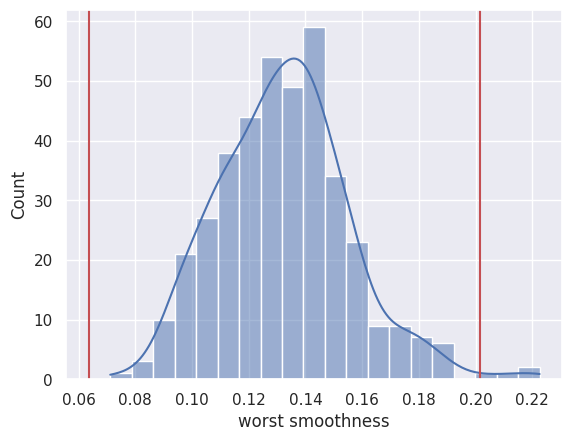

In [176]:
# Let’s use the function to capture the extreme limits of the mean smoothness variable, which follows approximately a Gaussian distribution:
lower_limit, upper_limit = find_limits(X_train, "worst smoothness", 3)


sns.histplot(data=X_train,x='worst smoothness',kde=True)
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r')
lower_limit, upper_limit

In [177]:
# Now let’s cap the values at the lower and upper limits:
X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
X_test["worst smoothness"].clip(lower=lower_limit,upper=upper_limit, inplace=True)

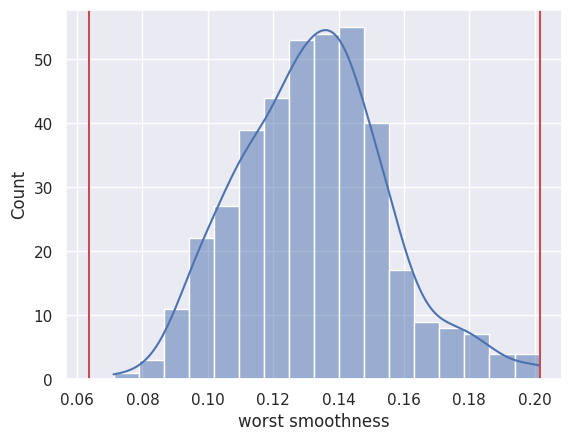

In [178]:
sns.histplot(data=X_train,x='worst smoothness',kde=True)
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r');

In [179]:
# Let’s check that the values were censored:
X_train["worst smoothness"].min(), X_train["worst smoothness"].max()

(0.07117, 0.20149734880520967)

### Now, we will cap multiple variables simultaneously utilizing **Feature-engine**. First, we need to separate the data into a training and testing set as we did in step 2.

In [180]:
# Let’s load the Breast Cancer dataset from scikit-learn and then separate it into a train and a test set:
X = pd.DataFrame(
breast_cancer.data,
columns=breast_cancer.feature_names)
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [173]:
# Let’s set up a transformer to cap two variables at the limits determined with the mean and standard deviation:
capper = Winsorizer(
    variables=["worst smoothness", "worst texture"],
    capping_method="gaussian",
    tail="both",
    fold=3,
)

(7.092123638591499, 43.97692158753917)

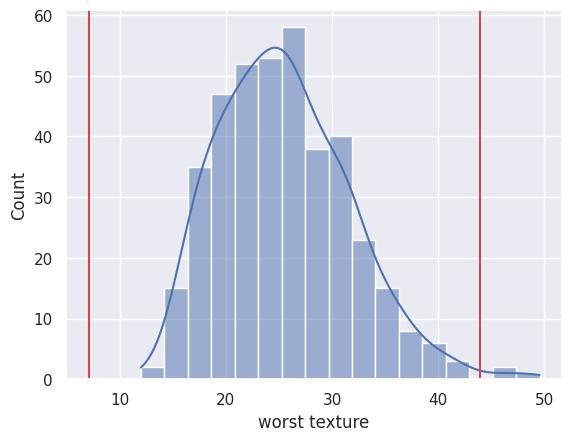

In [181]:
# Let’s use the function to capture the extreme limits of the mean smoothness variable, which follows approximately a Gaussian distribution:
lower_limit, upper_limit = find_limits(X_train, "worst texture", 3)


sns.histplot(data=X_train,x='worst texture',kde=True)
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r')
lower_limit, upper_limit

In [182]:
# Let’s fit the transformer to the data so that it learns those limits:
capper.fit(X_train)

Winsorizer(tail='both', variables=['worst smoothness', 'worst texture'])

In [183]:
X_train = capper.transform(X_train)
X_test = capper.transform(X_test)

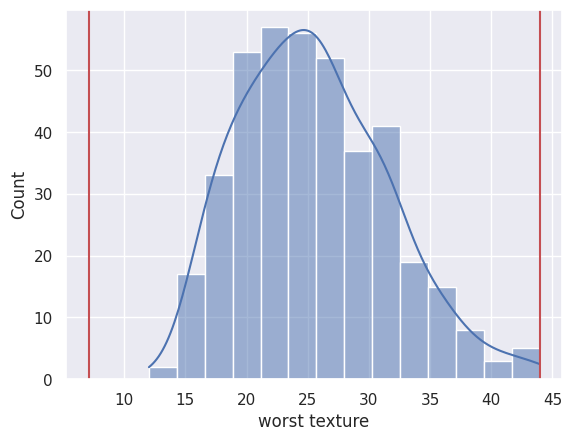

In [184]:
sns.histplot(data=X_train,x='worst texture',kde=True)
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r');

In [187]:
X_train['worst texture'].min(),X_train['worst texture'].max()

(12.02, 43.95373817300131)

## Capping outliers using quantiles

In [188]:
# Let’s load the Breast Cancer dataset from scikit-learn and then separate it into a train and a test set:
X = pd.DataFrame(
breast_cancer.data,
columns=breast_cancer.feature_names)
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

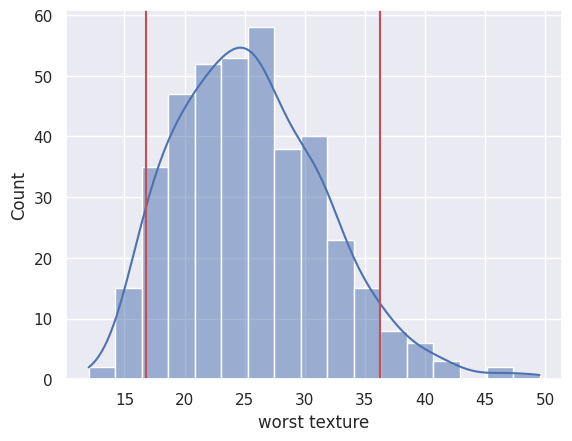

In [190]:
# Let’s cap the variable’s minimum and maximum values to the 5th and 95th percentile:

lower_limit = X_train['worst texture'].quantile(0.05)
upper_limit = X_train['worst texture'].quantile(0.95)

sns.histplot(data=X_train,x='worst texture',kde=True)
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r');

In [191]:
# # Now let’s cap the values at the lower and upper limits:
# X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit, inplace=True)
# X_test["worst smoothness"].clip(lower=lower_limit,upper=upper_limit, inplace=True)

In [192]:
capper = Winsorizer(
    variables = ["worst smoothness", "worst texture"],
    capping_method="quantiles",
    tail="both",
    fold=0.05,
)

In [193]:
capper.fit(X_train)
X_train = capper.transform(X_train)
X_test = capper.transform(X_test)

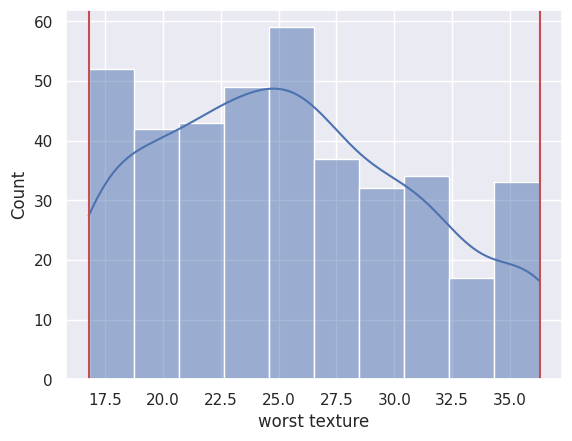

In [194]:
sns.histplot(data=X_train,x='worst texture',kde=True)
plt.axvline(lower_limit,color='r')
plt.axvline(upper_limit,color='r');

# References
- https://medium.com/analytics-vidhya/what-is-an-outliers-how-to-detect-and-remove-them-which-algorithm-are-sensitive-towards-outliers-2d501993d59